<a href="https://colab.research.google.com/github/srash007/Demand-Forecasting-with-Time-Series/blob/main/Online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Forecasting with Time Series using ARIMA (Auto. Regresive Integrated Moving Average)


Saving kaggle.json to kaggle.json


In [13]:
# Installer la bibliothèque Kaggle
#!pip install -q kaggle

import pandas as pd
# Créer le dossier .kaggle et copier le fichier
import os
import shutil
import zipfile


['.config', 'online-retail-ii-uci.zip', 'sample_data']

In [16]:
from google.colab import files
uploaded = files.upload()

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)
!kaggle datasets download -d mashlyn/online-retail-ii-uci

with zipfile.ZipFile("online-retail-ii-uci.zip", "r") as zip_ref:
    zip_ref.extractall("online_retail_ii")

# Et pour explorer les fichiers extraits
os.listdir("online_retail_ii")
df = pd.read_csv("online_retail_ii/online_retail_II.csv")
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
online-retail-ii-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


NameError: name 'file_path' is not defined

In [ ]:
#Librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
data = pd.read_csv('online_retail_II.csv')
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'online_retail_II.csv'

In [ ]:
data = data.dropna()

# Filter for positive quantities
data = data[data['Quantity'] > 0]

# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Group data by date and aggregate sales
daily_sales = data.resample('D', on='InvoiceDate').sum()['Quantity']

print(daily_sales.head())

NameError: name 'data' is not defined

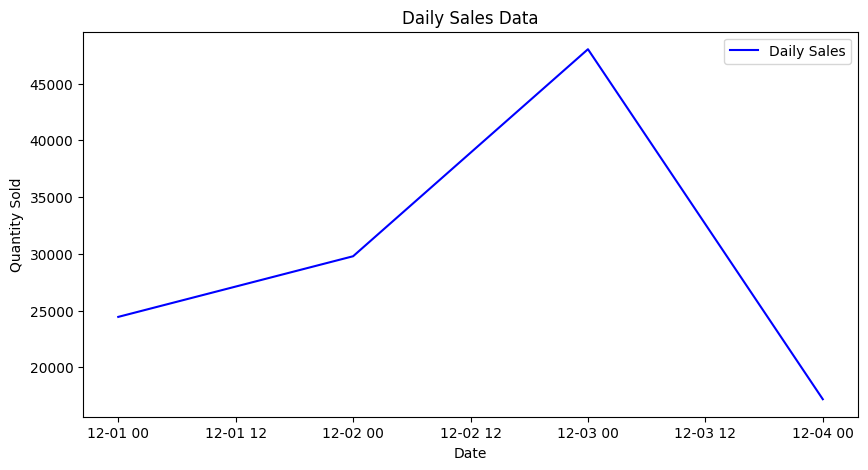

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_sales, color='blue', label='Daily Sales')
plt.title("Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()

### 2. Exploratory Analysis

I. Decomposition

In [ ]:
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 730 observations. x only has 4 observation(s)

II. Stationnary Test (Dickey-Fuller)

In [ ]:
result = adfuller(daily_sales.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Series is non-stationary. Applying differencing.")
    daily_sales = daily_sales.diff().dropna()

### 3. Modelisation

Use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to determine the values of p and q.

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(daily_sales.dropna(), ax=axes[0], lags=30)
axes[0].set_title("Autocorrelation (ACF)")

plot_pacf(daily_sales.dropna(), ax=axes[1], lags=30)
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()